In [1]:
# Descarga de archivos de ProfNER
!wget https://zenodo.org/record/4563995/files/profner.zip?download=1
# Si el unzip no funciona, revisar cual es el nombre de descarga del archivo
!unzip  profner.zip?download=1

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: profner/subtask-1/test-background-txt-files/1243953060050763778.txt  
  inflating: profner/subtask-1/test-background-txt-files/1243988693947486209.txt  
  inflating: profner/subtask-1/test-background-txt-files/1244173600753618945.txt  
  inflating: profner/subtask-1/test-background-txt-files/1244319340062822405.txt  
  inflating: profner/subtask-1/test-background-txt-files/1247000104193712129.txt  
  inflating: profner/subtask-1/test-background-txt-files/1247263989249212416.txt  
  inflating: profner/subtask-1/test-background-txt-files/1247465550931988482.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249075777544556545.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249253729720766466.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249964965546668034.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249980196838682624.txt  
  inflating: profner/subta

- Funciones de carga y preparación de datos

In [2]:
import sys
import os
import pandas as pd
def get_tweet_content(list_paths):
  """
    Función para guardar en un diccionario el contenido de archivos txt
    que se introduce en su entrada.
    Devuelve un diccionario en el que las claves son el id del tweet, y
    el valor el texto del tweet.
  """
  output_dict = dict()
  for i in list_paths:
    tweet_id = i.split("/")[-1].split(".txt")[0]
    with open(i) as f:
      output_dict[int(tweet_id)] = f.read()

  return output_dict

def get_profner_data(profner_path_data):
    # Obtenemos el path a los txt de los tweets.
    path_to_txt = profner_path_data+"subtask-1/train-valid-txt-files/"
    tweets_train_files = [path_to_txt+"train/"+i for i in os.listdir(path_to_txt+"train/")]
    tweets_valid_files = [path_to_txt+"valid/"+i for i in os.listdir(path_to_txt+"valid/")]
    # Obtenemos diccionarios en los que el key es el tweet_id y el value el texto del tweet.
    train_txt_content = get_tweet_content(tweets_train_files)
    valid_txt_content = get_tweet_content(tweets_valid_files)

    # Cargamos dos dataframes con los tweet_id y la categoría de los tweets
    path_to_labeled = profner_path_data+"subtask-1/"
    train_tweets = pd.read_csv(path_to_labeled+"train.tsv",sep="\t")
    valid_tweets = pd.read_csv(path_to_labeled+"valid.tsv",sep="\t")

    # Introducimos a los df el campo de texto mapeando los diccionarios con tweet_id
    train_tweets["tweet_text"] = train_tweets['tweet_id'].map(train_txt_content)
    train_tweets["set"] = "train"
    valid_tweets["tweet_text"] = valid_tweets['tweet_id'].map(valid_txt_content)
    valid_tweets["set"] = "valid"

    # Concatenamos el resultado
    output_df = pd.concat([train_tweets,valid_tweets],axis=0)
    # Eliminamos retorno de carro
    output_df["tweet_text"] = output_df.tweet_text.apply(lambda x: x.replace('\n', ' '))
    return output_df[["tweet_id","tweet_text","label","set"]].reset_index(drop=True)

# Ejercicio 1


En este ejercicio se trabajará con un conjunto de datos reales publicados para la shared-task [ProfNER](https://temu.bsc.es/smm4h-spanish/), celebrada en el año 2021. Específicamente, se utilizarán los datos textuales de la subtarea 1, centrada en la clasificación de textos. Este conjunto de datos son tweets en español que tienen asignada una etiqueta numérica, que representa la presencia (valor 1) o no (valor 0) de menciones de profesiones en el tweet. Por si fuera de tu interés, el proceso de obtención, selección y anotación de datos está descrita en [este enlace.](https://temu.bsc.es/smm4h-spanish/?p=4003).

Para el ejercicio debéis entrenar diferentes modelos de clasificación que permitan clasificar correctamente los tweets. Para ello será necesario crear y utilizar funciones de preprocesado de datos similares a las vistas en clase, aplicar estrategias de vectorización de trextos como TF-IDF o embeddings, y entrenar/evaluar modelos de clasificación. Para que os sirva de orientación, los criterios de evaluación del ejercicio serán los siguientes:

-	**Análisis exploratorio, pre-procesado y normalización de los datos (30%)**:
        -	El ejercicio deberá contener un análisis exploratorio de los datos como número de documentos, gráficas de distribución de longitudes y/o wordclouds, entre otros análisis que se os pudieran ocurrir. Vuestros ejercicios deberán incorporar al menos los análisis exploratorios vistos en clase.

    -	También tendréis que tener funciones para normalizar textos que permitan eliminar palabras vacías, quitar símbolos de puntuación y lematizar o hacer stemming.  

-	**Vectorización de textos (40%)**

    En clase hemos visto diferentes estrategias de vectorización como TF-IDF y Word Embeddings. También hemos visto como incorporar características adicionales utilizando el sentimiento de los documentos. Para este ejercicio sois libres de utilizar la estrategia de vectorización que queráis, pero:
  -	Si decidís utilizar TF-IDF será necesarios que incorporéis a modelo características adicionales de sentimiento utilizando recursos adicionales (como por ejemplo la librería TextBlob).
  -	Si optáis por representar el texto mediante embeddings, dado que en clase no se profundizado sobre el tema no será necesario incorporar esas características adicionales. Si decidís esta segunda opción, podéis utilizar los embeddings en español que vimos en clase

-	**Entrenamiento y validación del sistema (30%)**
  -	En el proceso de entrenamiento del modelo tendréis que testear al menos 3 modelos de clasificación. El procedimiento debe ser similar al visto en clase, en el que primero estimábamos el rendimiento de varios algoritmos de forma general, para posteriormente seleccionar el mejor para ajustar los hiperparámetros.


## 0. Imports


In [3]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 5.5 MB/s eta 0:00:00


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import string
import re
import contractions
from tqdm.autonotebook import tqdm
tqdm.pandas()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import classification_report

<ipython-input-7-e431c9ce4b8b>:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## 1. Obtención del corpus


In [4]:
profner_path = "./profner/"
datos_ejercicio = get_profner_data(profner_path)

In [ ]:
datos_ejercicio.head(4)

,tweet_id,tweet_text,label,set
0,1256007275807997953,CHINA: libera una pandemia EE.UU: libera OVNIS...,0,train
1,1257909427677601792,San Francisco (EEUU) hace 100 años tras vivir ...,0,train
2,1281580572415066112,Porfi poneos la mascarilla o tendremos 28 nuev...,0,train
3,1271348112733470720,El nuevo „covid normas y reglas recibimiento“ ...,0,train


## 2. Análisis exploratorio



- **Número de documentos y columnas:**

Realizamos un análisis de los datos previo a la normalización de los mismos ya que nos va a permitir extraer información relevante del dataset, así como posibles inconvenientes si los hubiera.

In [5]:
print("Tenemos un conjunto de {} documentos".format(len(datos_ejercicio)))
print("El dataframe tiene {} columnas".format(datos_ejercicio.shape[1]))

Tenemos un conjunto de 8000 documentos
El dataframe tiene 4 columnas


- **Número de documentos duplicados:**

Comprobamos y eliminamos las filas con algún valor vacío (NA) y quitamos los duplicados.

In [8]:
print("Existen {} noticias duplicadas".format(np.sum(datos_ejercicio.duplicated(subset=["tweet_text"]))))
# Quitaremos esos duplicados
datos_ejercicio = datos_ejercicio.drop_duplicates()
print("Despues de quitar duplicados tenemos un conjunto de {} noticias".format(datos_ejercicio.shape[0]))

Existen 0 noticias duplicadas
Despues de quitar duplicados tenemos un conjunto de 8000 noticias


Comprobaremos que no hayan quedado valores Nulls.

In [9]:
print("Hay {} valores vacíos en las noticias y {} valores vacíos en las etiquetas en los datos".format(np.sum(datos_ejercicio.isnull())[0],
                                                                                                        np.sum(datos_ejercicio.isnull())[1]))

Hay 0 valores vacíos en las noticias y 0 valores vacíos en las etiquetas en los datos


- **Número de documentos por cada clase:**


In [10]:
print(datos_ejercicio["label"].value_counts())

# Número de elementos de cada clase:
datos_ejercicio.groupby(['label']).count()

0    6130
1    1870
Name: label, dtype: int64


,tweet_id,tweet_text,set
label,,,
0,6130,6130,6130
1,1870,1870,1870


Vamos a dibujar un histograma para mostrar cada clase:

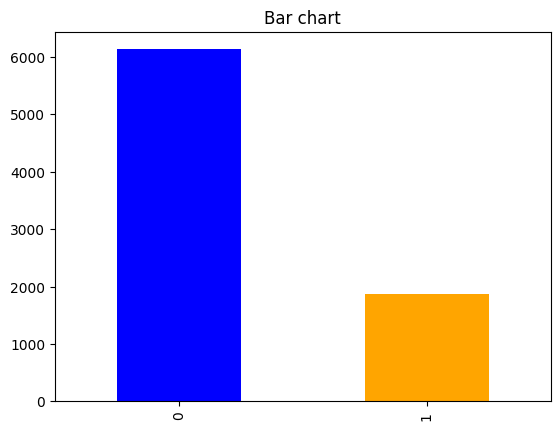

In [11]:
ax, fig = plt.subplots()
etiquetas = datos_ejercicio.label.value_counts()
etiquetas.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

- **Distribución de la longitud de los tweet en caracteres:**

Creamos las columnas que van a almacenar las longitud en caracteres y en tokens de los documentos del corpus:

In [12]:
datos_ejercicio["char_len"] = datos_ejercicio["tweet_text"].apply(lambda x: len(x))

<ipython-input-13-530474acd392>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt1 = sns.distplot(datos_ejercicio[datos_ejercicio["label"]==0].char_len, hist=True, label="real")
<ipython-input-13-530474acd392>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt2 = sns.distplot(datos_ejercicio[datos_ejercicio["label"]

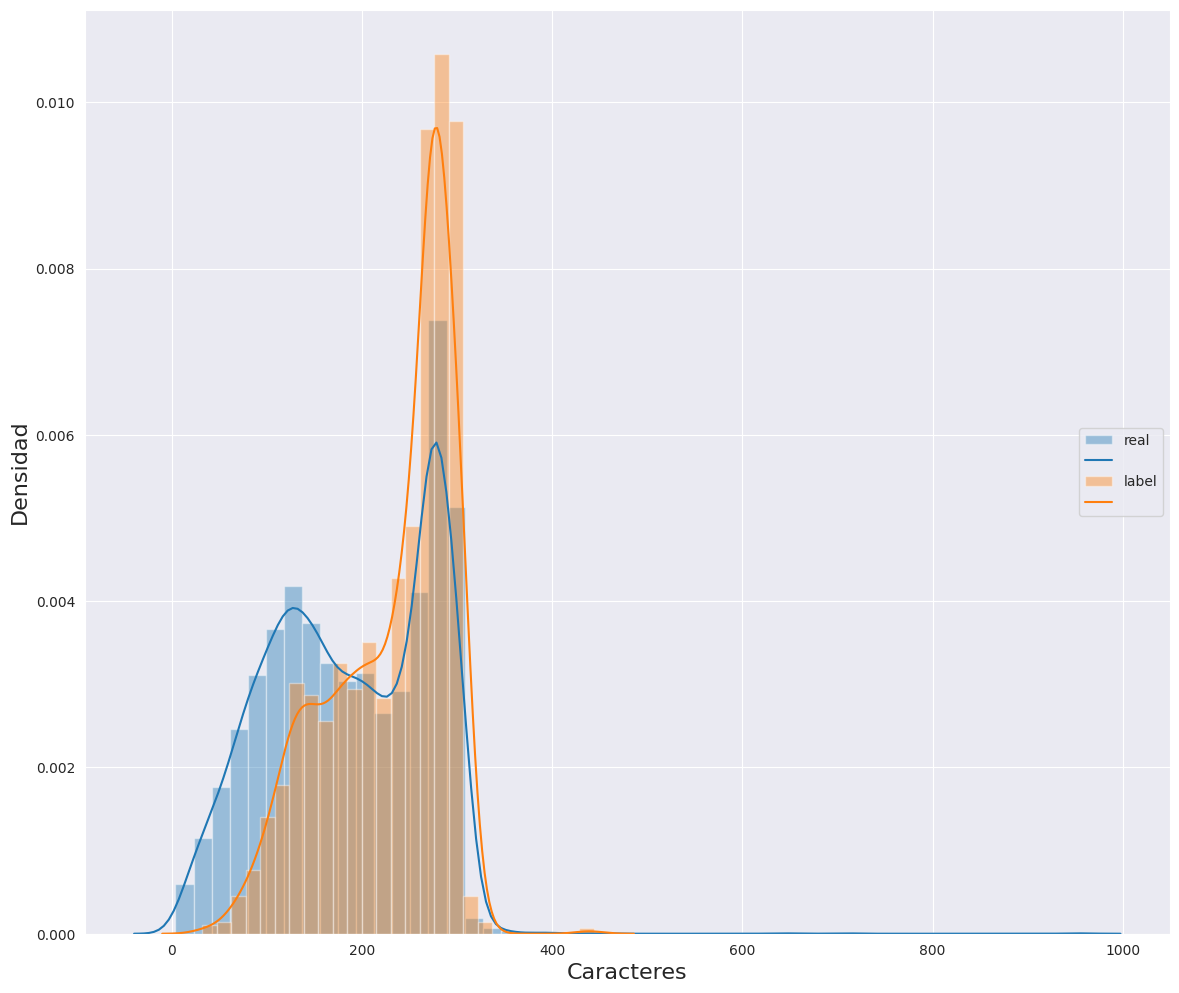

In [13]:
# Importamos las librerías matplotlib y seaborn:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(14,12))
sns.set_style("darkgrid")
# Añadimos series para cada categoría (eligiendo la seríe de char_len)
plt1 = sns.distplot(datos_ejercicio[datos_ejercicio["label"]==0].char_len, hist=True, label="real")
plt2 = sns.distplot(datos_ejercicio[datos_ejercicio["label"]==1].char_len, hist=True, label="fake")
plt.legend(labels=['real',"",'label',""], loc = 5)

# Definimos el título de los ejes:
plt.xlabel('Caracteres', fontsize=16)
plt.ylabel('Densidad', fontsize=16)

# Finalmente mostramos el gráfico:
plt.show()

## 3. Preprocesado y Normalización

Vamos a proceder a normalizar los datos. Para ello vamos a generar pequeñas funciones que nos permitan:

- Eliminar espacios extra.
- Transformar a minúsculas.
- Tokenizar.
- Reemplazar contractions.
- Lematizar tokens.
- Eliminar stopwords.
- Eliminar sígnos de puntuación.

In [14]:
# Eliminar espacios
def eliminar_espacios(text):
    return  " ".join(text.split())

# To lower
def texto_to_lower(text):
  return text.lower()

# Tokenizador
from nltk import word_tokenize
def tokenization(text):
  tokens = nltk.word_tokenize(text)
  return tokens

# Reemplazar contractions usando la librería "contractions" https://github.com/kootenpv/contractions
def replace_contraction(text):
    expanded_words = []
    for t in text.split():
        expanded_words.append(contractions.fix(t))
    expanded_text = ' '.join(expanded_words)
    return expanded_text

# Quitar stop words
from nltk.corpus import stopwords
def quitar_stopwords(tokens):
    stop_words = set(stopwords.words('spanish'))
    filtered_sentence = [w for w in tokens if not w in stop_words]
    return filtered_sentence


# Eliminar signos de puntuación (nos quedamos sólo lo alfanumérico en este caso)
def quitar_puntuacion(tokens):
    words=[word for word in tokens if word.isalnum()]
    return words


# Lemmatization
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
def lematizar(tokens):
    sentence = " ".join(tokens)
    mytokens = nlp(sentence)
    # Lematizamos los tokens y los convertimos  a minusculas
    mytokens = [ word.lemma_ if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    # Extraemos el text en una string
    return " ".join(mytokens)


import string
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stem(tokens):
    tokens = [ stemmer.stem(token) for token in tokens]
    return tokens

In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
# Espacios
datos_ejercicio["normaliza"] = datos_ejercicio["tweet_text"].progress_apply(lambda x: eliminar_espacios(x))
# To Lower
datos_ejercicio["normaliza"] = datos_ejercicio["normaliza"].progress_apply(lambda x: texto_to_lower(x))
# Contraciones
datos_ejercicio["normaliza"] = datos_ejercicio["normaliza"].progress_apply(lambda x: replace_contraction(x))
# Tokenizar
datos_ejercicio["normaliza"] = datos_ejercicio["normaliza"].progress_apply(lambda x: tokenization(x))
# Quitar Stopwords
datos_ejercicio["normaliza"] = datos_ejercicio["normaliza"].progress_apply(lambda x: quitar_stopwords(x))
# Quitar puntuación
datos_ejercicio["normaliza"] = datos_ejercicio["normaliza"].progress_apply(lambda x: quitar_puntuacion(x))
# Stemming
datos_ejercicio["normaliza"] = datos_ejercicio["normaliza"].progress_apply(lambda x: stem(x))
# Mirar todo lo que tarda con lematización (mediante spacy)
#dataset["normaliza"] = dataset["normaliza"].progress_apply(lambda x: lematizar(x))

datos_ejercicio["normaliza"]

  0%|          | 0/8000 [00:00<?, ?it/s]

  0%|          | 0/8000 [00:00<?, ?it/s]

  0%|          | 0/8000 [00:00<?, ?it/s]

  0%|          | 0/8000 [00:00<?, ?it/s]

  0%|          | 0/8000 [00:00<?, ?it/s]

  0%|          | 0/8000 [00:00<?, ?it/s]

  0%|          | 0/8000 [00:00<?, ?it/s]

0       [china, libera, pandemia, libera, ovni, argent...
1       [san, francisco, eeuu, hace, 100, año, tra, vi...
2       [porfi, poneo, mascarilla, 28, nueva, cancion,...
3       [nuevo, covid, norma, regla, recibimiento, com...
4       [si, confinamiento, dejado, tocada, estabilida...
                              ...                        
7995    [lomásleído, nuevo, infectado, coronaviru, mul...
7996    [ayuso, adjudica, dedo, contrato, euro, hacer,...
7997    [mese, encerrado, pued, viajar, provincia, ir,...
7998    [gobierno, prohíb, ley, li, despido, crisi, co...
7999        [rasgo, psicológico, lleva, mascarilla, http]
Name: normaliza, Length: 8000, dtype: object

In [18]:
# Load the regular expression library
import re
import string
# Quita los emails presententes en un string (toma todos los string desde un espacio hasta la @ y todo lo que hay desde la @ hasta un espacio y lo sustituye por un "")
datos_ejercicio['text_processed'] = datos_ejercicio['tweet_text'].apply(lambda x: re.sub('\S*@\S*\s?', '', x))
# sustituir el \n
datos_ejercicio['text_processed'] = datos_ejercicio['text_processed'].apply(lambda x: re.sub('\n', ' ', x))
# Quitar/eliminar las comillas
datos_ejercicio['text_processed'] = datos_ejercicio['text_processed'].apply(lambda x: re.sub('\'', ' ', x))
# Convertir a lowercase
datos_ejercicio['text_processed'] = datos_ejercicio['text_processed'].apply(lambda x: x.lower())
# Eliminar puntuación
datos_ejercicio['text_processed'] = datos_ejercicio['text_processed'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
datos_ejercicio['text_processed']

0       china libera una pandemia eeuu libera ovnis ar...
1       san francisco eeuu hace 100 años tras vivir la...
2       porfi poneos la mascarilla o tendremos 28 nuev...
3       el nuevo „covid normas y reglas recibimiento“ ...
4       si el confinamiento ha dejado algo tocada tu e...
                              ...                        
7995    lomásleído  los nuevos infectados de coronavir...
7996    ayuso adjudica a dedo un contrato de 30000 eur...
7997    meses encerrados se puede viajar a otras provi...
7998    el gobierno prohíbe por ley lis despidos duran...
7999    rasgos psicológicos de por qué no llevas masca...
Name: text_processed, Length: 8000, dtype: object

El dataset es muy grande como para hacer las operaciones que queremos hacer durante la clase de forma rápida. Vamos a quedarnos con sólo una muestra.

In [19]:
dataset2 = datos_ejercicio.sample(700)

In [20]:
#!python -m spacy download en_core_web_sm
#!python -m spacy link en_core_web_sm en
#import nltk
#nltk.download('stopwords')

from nltk.corpus import stopwords
import string
import spacy
punctuations = string.punctuation
nlp = spacy.load("en_core_web_sm")
stop_words = stopwords.words('english')

def spacy_tokenizer(sentence):
    mytokens = nlp(sentence)

    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    return mytokens

Procesemos las frases con esa función:

In [21]:
data_words = list()
for i in dataset2["text_processed"].tolist():
  data_words.append(spacy_tokenizer(i))

In [22]:
data_words[1]

['madre',
 'míala',
 'oms',
 'declarando',
 'la',
 'pandemia',
 'el',
 '11',
 'de',
 'marzo',
 'cuando',
 'en',
 'el',
 'informe',
 'de',
 'la',
 'guardia',
 'civil',
 'pone',
 'que',
 'la',
 'declaró',
 'el',
 '30',
 'de',
 'enero',
 '¡',
 'ver',
 'si',
 'ahora',
 'va',
 'saber',
 'más',
 'la',
 'om',
 'que',
 'la',
 'guardia',
 'civil']

# 4. Vectorización

In [23]:
print(datos_ejercicio.columns)

Index(['tweet_id', 'tweet_text', 'label', 'set', 'char_len', 'normaliza',
       'text_processed'],
      dtype='object')


In [24]:
vectorizador = TfidfVectorizer(lowercase = False, stop_words =None,
                               min_df=0.01, ngram_range = (1,3), max_features = 300)

vector_data = vectorizador.fit_transform(datos_ejercicio["tweet_text"])

## 5. TRANSFORMACIÓN

In [25]:
import gensim
# Construimos los modelos de bigramas y trigramas con gensim
# No devuelve trigramas o bigtamas en si mismos, si no que asocia palabras
# que aparecen juntas en mltitud de ocasiones
bigram = gensim.models.Phrases(data_words, min_count=10, threshold=100) # higher threshold fewer phrases.

# Con esto todo va más rápido, pero ya no pueden modificarse lo anterior
# https://www.kite.com/python/docs/gensim.models.phrases.Phraser
# The goal of this class is to cut down memory consumption of `Phrases`, by discarding model state
# not strictly needed for the bigram detection task.
# Use this instead of `Phrases` if you do not need to update the bigram statistics with new documents any more.
bigram_mod = gensim.models.phrases.Phraser(bigram)

In [26]:
bigram_mod

Lo que hacen estas librerías es generar bigramas a partir de la similitud que tienen las palabras en un espacio vectorial (utiliza word2vec por detrás).

In [27]:
[bigram_mod[i] for i in data_words]

[['vamos',
  'salir',
  'mejore',
  'vamos',
  'salir',
  'mejore',
  'porque',
  'sabemos',
  'ser',
  'personas',
  'cumplir',
  'normas',
  'da',
  'igual',
  'que',
  'estemos',
  'en',
  'una',
  'pandemia',
  'mundial',
  'trabajo',
  'en',
  'una',
  'tienda',
  'de',
  'ropa',
  'esto',
  'es',
  'lo',
  'que',
  'ha',
  'pasado',
  'abro',
  'hilo',
  'por',
  'una',
  'vez',
  'relacionado',
  'con',
  'el',
  'arte',
  '⬇',
  '️',
  'httpstco2wyll3jisy'],
 ['madre',
  'míala',
  'oms',
  'declarando',
  'la',
  'pandemia',
  'el',
  '11',
  'de',
  'marzo',
  'cuando',
  'en',
  'el',
  'informe',
  'de',
  'la',
  'guardia',
  'civil',
  'pone',
  'que',
  'la',
  'declaró',
  'el',
  '30',
  'de',
  'enero',
  '¡',
  'ver',
  'si',
  'ahora',
  'va',
  'saber',
  'más',
  'la',
  'om',
  'que',
  'la',
  'guardia',
  'civil'],
 ['quiero',
  'estar',
  'viendo',
  'películas',
  'con',
  'mi',
  'chikistrikis',
  'puto',
  'covid'],
 ['el',
  'momento',
  'es',
  'grave',
 

In [28]:
bigram_mod[data_words[1]]

['madre',
 'míala',
 'oms',
 'declarando',
 'la',
 'pandemia',
 'el',
 '11',
 'de',
 'marzo',
 'cuando',
 'en',
 'el',
 'informe',
 'de',
 'la',
 'guardia',
 'civil',
 'pone',
 'que',
 'la',
 'declaró',
 'el',
 '30',
 'de',
 'enero',
 '¡',
 'ver',
 'si',
 'ahora',
 'va',
 'saber',
 'más',
 'la',
 'om',
 'que',
 'la',
 'guardia',
 'civil']

In [29]:
type(bigram_mod)

gensim.models.phrases.FrozenPhrases

Ahora hay que aplicar los modelos a los datos


In [30]:
# NLTK Stop words
# import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
#stop_words.extend(['day', 'hotel', 'room', 'great', 'night','staff','service'])
# Define functions for stopwords, bigrams, trigrams and lemmatization
# Antes "entrenamos" el generador de bigrams, ahora se generan realmente en nuestros textos
def make_bigrams(textos):
    return [bigram_mod[doc] for doc in textos]

# Función para eliminar cierto tipo de tags
def filtra_tags(textos, tags_permitidas=['NOUN', 'ADJ', 'VERB', 'ADV']):
    textos_out = []
    for sent in textos:
        # Juntal los "trigrams"
        doc = nlp(" ".join(sent))
        # Filtra por etiqueta y coge lemma (es algo redundante)
        textos_out.append([token.text for token in doc if token.pos_ in tags_permitidas])
    return textos_out

Vamos a aplicar estas funciones:

In [31]:
import spacy
# Remove Stop Words
#data_words_nostops = remove_stopwords(data_words)
# Crear Bigrams
data_words_bigrams = make_bigrams(data_words)

# Desabilitamos el "NER" y el "Parser" que no lo vamos a usar
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
#  Filtrar por categoría gramatical
data_pos = filtra_tags(data_words_bigrams, tags_permitidas=['NOUN','ADJ','ADV'])

In [32]:
print("Numero tokens antes de filtrar: {} tokens".format(len(data_words_bigrams[2])))
print("Numero tokens despues de filtrar: {} tokens".format(len(data_pos[2])))

Numero tokens antes de filtrar: 9 tokens
Numero tokens despues de filtrar: 0 tokens


In [33]:
len(data_pos)

700

Después de ese procesado tenemos un conjunto de 700 documentos procesados y preparados para introudcir a un modelo de topic modeling

## 5. Entrenamiento y evaluación de modelos


### 5.1. MODELO 1: Topic Modeling

Despues de ese procesado tenemos un conjunto de 700 documentos procesados y preparados para introducir a un modelo de topic modeling

En primer lugar generamos un diccionario utilizando los objetos de Gensim. Ese diccionario contiene un método "doc2bow" que transforma el texto a vectores comprensibes por el modelo LDA.

In [34]:
import gensim.corpora as corpora
# Creamos diccionario de términos
id2word = corpora.Dictionary(data_pos)
print(id2word)

Dictionary<1178 unique tokens: ['esto', 'hilo', 'igual', 'mejore', 'mundial']...>


In [35]:
# Asignamos a la variable texts nuestro corpus
texts = data_pos
# Transformamos nuestro corpus limpio a Bag of Words.
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)], [(9, 1), (10, 1), (11, 1)], [], [(12, 1), (13, 1)], [(14, 1), (15, 1)], [(16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1)], [(22, 1)], [(23, 1), (24, 1), (25, 1)], [(26, 1), (27, 1), (28, 1)], [(5, 2), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1)], [], [], [(22, 1), (35, 1), (36, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1)], [(5, 1), (18, 1), (36, 1), (46, 1), (47, 1), (48, 1)], [(11, 1), (49, 1), (50, 1)], [(51, 1), (52, 1), (53, 1), (54, 1), (55, 1)], [(56, 1)], [(57, 1)], [(5, 1), (27, 1), (36, 1), (39, 1), (58, 1), (59, 1)], [(20, 1), (60, 1), (61, 1), (62, 1), (63, 1)], [(64, 1), (65, 1)], [(66, 1)], [], [(67, 1), (68, 1), (69, 1)], [(5, 1), (23, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1)], [], [(77, 2), (78, 1), (79, 1)], [(80, 1)], [(5, 1), (36, 1), (79, 1), (81, 1), (82, 1), (83, 1), (84, 1)], [(57, 1)], [(5, 1),

Los modelos LDA necesitan además de los vectores de entrada, un número de "topics" para ser entrenados. Como no sabemos a priori cuantos hay, creamos la función "calculo_valor_coherencia" que a partir del corpus, el diccionario y otros valores calcula un modelo lda, calcula la coherencia entre sus topics y la devuelve

In [36]:
# supporting function
def calculo_valor_coherencia(corpus, dictionary, k, a, b):
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k,
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)

    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_pos, dictionary=dictionary, coherence='c_v')

    return coherence_model_lda.get_coherence()

In [37]:
from tqdm.autonotebook import tqdm
tqdm.pandas()

Vamos a calcular la coherencia suponiendo distintos números de topics. Por ejemplo de 1 a 22 en saltos de 2.

In [38]:
import numpy as np
from tqdm import tqdm  # Importa tqdm correctamente
from gensim.models import CoherenceModel  # Importa CoherenceModel
grid = {}
# Topics range
min_topics = 2
max_topics = 22
step_size = 2
topics_range = range(min_topics, max_topics, step_size)
# Alpha
alpha = 0.01
# Beta
beta = 0.9
# Validation sets
num_of_docs = len(corpus)
corpus_sets = corpus
corpus_title = '100% Corpus'
model_results = {'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []}

# Vamos a esperar mucho....
if 1 == 1:
    pbar = tqdm()
    # Itera a lo largo del range de los topics
    for k in topics_range:
      # Calculamos coherencia para esos topics
      cv = calculo_valor_coherencia(corpus=corpus, dictionary=id2word,
                                    k=k, a=alpha, b=beta)
      # Guardamos los datos
      #model_results['Validation_Set'].append(corpus_title[i])
      model_results['Topics'].append(k)
      model_results['Alpha'].append(alpha)
      model_results['Beta'].append(beta)
      model_results['Coherence'].append(cv)

      pbar.update(1)
    pbar.close()

10it [00:32,  3.20s/it]


In [39]:
model_results

{'Topics': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
 'Beta': [0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9],
 'Coherence': [0.4928983682988253,
  0.505164430940214,
  0.5280313259921732,
  0.5507691373792406,
  0.5098270355513724,
  0.4998695732469271,
  0.5251540853191665,
  0.4790194768807749,
  0.4493271660997582,
  0.42371925706929403]}

Ploteamos el resultado y observamos que el máximo de coherencia está en torno a 6 topics.

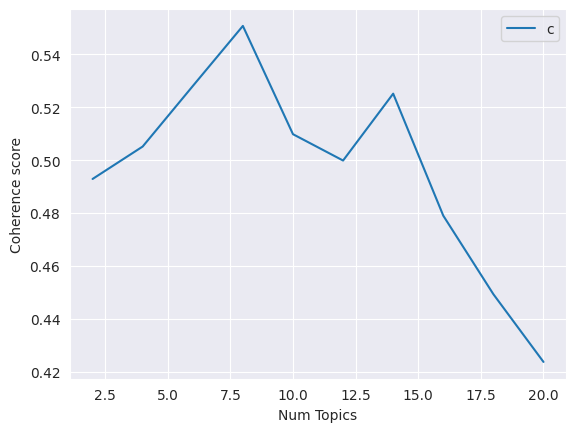

In [40]:
# Show graph
import matplotlib.pyplot as plt
plt.plot(topics_range, model_results["Coherence"])
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

Entrenamos el modelo con el número de topics anteriormente calculado:

In [41]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                      id2word=id2word,
                                      num_topics=6,
                                      random_state=100,
                                      chunksize=100,
                                      passes=10,
                                      alpha=0.01,
                                      eta=0.9)

In [42]:
model_topics = lda_model.show_topics(formatted=False)
print(lda_model.print_topics(num_words=3))

[(0, '0.005*"gente" + 0.004*"por" + 0.004*"responsable"'), (1, '0.008*"crisis" + 0.006*"puede" + 0.006*"social"'), (2, '0.034*"por" + 0.017*"este" + 0.015*"que"'), (3, '0.040*"pandemia" + 0.008*"esto" + 0.005*"cómo"'), (4, '0.035*"covid19" + 0.015*"por" + 0.009*"pandemia"'), (5, '0.011*"mascarilla" + 0.009*"sin" + 0.006*"mejor"')]


Utilizando el método get_document_topics() sobre el texto del corpus que queramos podemos detectar la composición de temas que tiene cada documento:

In [43]:
# Obtener las probabilidades de tópicos para el primer documento en el corpus
doc_topics = lda_model.get_document_topics(corpus[0])

# Crear un diccionario de mapeo inverso de ID de palabras a palabras reales
id2word = lda_model.id2word

# Imprimir las probabilidades de tópicos junto con las palabras correspondientes
for topic_id, topic_prob in doc_topics:
    print(f"Tópico {topic_id}: {topic_prob:.4f}")
    words = [id2word[word_id] for word_id, word_prob in lda_model.get_topic_terms(topic_id)]
    print(f"Palabras en el tópico: {', '.join(words)}\n")

Tópico 3: 0.9950
Palabras en el tópico: pandemia, esto, cómo, ver, covid, 🏻, este, mucho, plena, audio



Podríamos ver la contribución de una palabra específica a cada uno de los topics con get_term_topics:

In [44]:
word_to_check = "covid19"

# Verificar si la palabra está en el vocabulario
if word_to_check in lda_model.id2word.values():
    # Obtener los temas más relevantes para la palabra
    term_topics = lda_model.get_term_topics(word_to_check, minimum_probability=0.0001)
    if term_topics:
        # Imprimir los temas encontrados
        print(f"Temas relevantes para '{word_to_check}':")
        for topic_id, score in term_topics:
            print(f"Tema {topic_id}: Score {score}")
    else:
        print(f"No se encontraron temas relevantes para '{word_to_check}'.")
else:
    print(f"La palabra '{word_to_check}' no está en el vocabulario del modelo LDA.")

Temas relevantes para 'covid19':
Tema 0: Score 0.0004105559200979769
Tema 1: Score 0.00040578708285465837
Tema 2: Score 0.0018702654633671045
Tema 3: Score 0.0003761000116355717
Tema 4: Score 0.03488712012767792
Tema 5: Score 0.0004282658628653735


### 5.2. MODELO 2

In [45]:
# Importamos numpy:
import numpy as np

# Definimos la variable de categorías:
y = datos_ejercicio["label"].values.astype(np.float32)

print(y.shape)

(8000,)


En primer lugar, dividamos el dataset en Train/Test:

In [46]:
X_train, X_test, y_train, y_test = train_test_split(vector_data, y , random_state=0)
print(X_train.shape)
print(X_test.shape)

(6000, 300)
(2000, 300)


- **Decision de modelo de ML a utilizar**

In [47]:
# Definimos las funcionalidades pertinentes de sklearn:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
# Definimos la función encargada de evaluar los modelos:
def model_evaluation(models, score, X, y):
      results = []
      names = []
      #PAra cada modelo
      for name, model in models:
          warnings.filterwarnings('ignore')
          # Generamos un Kfold
          KF = KFold(n_splits = 10, shuffle = True, random_state = 98)

          # hacemos croos_val
          cv_results = cross_val_score(model, X, y, cv = KF, scoring = score, verbose = False)

          # Guardamos los resultados:
          results.append(cv_results)
          names.append(name)

          # Mostramos los resultados numéricamente:
          print('Metric: {} , KFold '.format(str(score)))
          print("%s: %f (%f) " % (name, cv_results.mean(), cv_results.std()))

      return results, names

Una vez definida la función, podemos definir los modelos con los que hacer la evaluación. En este caso hemos incorporado la regresión logística y una naive bayes.

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Definimos los modelos y generamos una lista con cada uno de ellos:
models = [
    ("Logistic", LogisticRegression(random_state=30)),
    ("GaussianNB", GaussianNB()),
    ("DecisionTree", DecisionTreeClassifier(random_state=30)),
    ("RandomForest", RandomForestClassifier(random_state=30)),
    ("SVM", SVC(random_state=30)),
    ("KNN", KNeighborsClassifier()),
    ("MLP", MLPClassifier(random_state=30)),
    ("GradientBoosting", GradientBoostingClassifier(random_state=30))
]

evaluation_score = "accuracy"

model_evaluation(models, evaluation_score, vector_data.toarray(), y)

Metric: accuracy , KFold 
Logistic: 0.780750 (0.011514) 
Metric: accuracy , KFold 
GaussianNB: 0.593750 (0.014042) 
Metric: accuracy , KFold 
DecisionTree: 0.697250 (0.014977) 
Metric: accuracy , KFold 
RandomForest: 0.783125 (0.016623) 
Metric: accuracy , KFold 
SVM: 0.782625 (0.017997) 
Metric: accuracy , KFold 
KNN: 0.751500 (0.020339) 
Metric: accuracy , KFold 
MLP: 0.748875 (0.012716) 
Metric: accuracy , KFold 
GradientBoosting: 0.782000 (0.015882) 


([array([0.79   , 0.79875, 0.77   , 0.7775 , 0.78375, 0.7725 , 0.795  ,
         0.76   , 0.78625, 0.77375]),
  array([0.58875, 0.56125, 0.59375, 0.58375, 0.58625, 0.60625, 0.60625,
         0.60625, 0.61   , 0.595  ]),
  array([0.7075 , 0.71375, 0.69125, 0.67   , 0.67375, 0.7075 , 0.715  ,
         0.69875, 0.705  , 0.69   ]),
  array([0.7875 , 0.8125 , 0.765  , 0.775  , 0.79375, 0.77875, 0.8    ,
         0.7525 , 0.79125, 0.775  ]),
  array([0.7875 , 0.815  , 0.76125, 0.7725 , 0.79625, 0.7775 , 0.80125,
         0.75125, 0.7875 , 0.77625]),
  array([0.73875, 0.79125, 0.7175 , 0.7475 , 0.765  , 0.75   , 0.75375,
         0.73375, 0.77625, 0.74125]),
  array([0.745  , 0.76   , 0.74125, 0.76375, 0.75375, 0.7175 , 0.75625,
         0.75375, 0.75625, 0.74125]),
  array([0.785  , 0.80625, 0.76   , 0.76875, 0.79625, 0.78   , 0.8    ,
         0.7575 , 0.79125, 0.775  ])],
 ['Logistic',
  'GaussianNB',
  'DecisionTree',
  'RandomForest',
  'SVM',
  'KNN',
  'MLP',
  'GradientBoosting'])

Observamos un mejor funcionamiento con el regresor logístico, que será con el que intentaremos afinar los hiperparámetros:

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# define models and parameters
model = RandomForestClassifier()
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

Vamos a generar un diccionario para la búsqueda Grid y también generaremos el objeto GridSearchCV. Vamos a utilizar una métrica de búsqueda basada en accuracy (por probar)

In [50]:
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = KFold(n_splits=10)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

Entrenamos el modelo y hacemos un "print" del mejor resultado:

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define los valores que deseas explorar para RandomForestClassifier
param_dist = {
    'n_estimators': np.arange(100, 1000, 100),  # Rango de valores
    'max_depth': [None, 10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2'],
    # Otros hiperparámetros relevantes
}

# Crea el modelo RandomForestClassifier
model = RandomForestClassifier(random_state=30)

# Configura la validación cruzada y la búsqueda de hiperparámetros
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)

# Ajusta el modelo
random_result = random_search.fit(X_train, y_train)

# Imprime los resultados
print("Mejor accuracy: %f usando los parámetros %s" % (random_result.best_score_, random_result.best_params_))

Mejor accuracy: 0.779667 usando los parámetros {'n_estimators': 800, 'max_features': 'auto', 'max_depth': 20}


In [52]:
from sklearn.model_selection import (KFold, cross_val_score,cross_validate)
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

model=LogisticRegression(C=100, penalty="l2", solver = "liblinear")
model.fit(X_train,y_train)

LogisticRegression(C=100, solver='liblinear')

Predecimos con el set de test, y creamos una matriz de confusión y un "classification report".

In [53]:
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1462   81]
 [ 349  108]]
              precision    recall  f1-score   support

         0.0       0.81      0.95      0.87      1543
         1.0       0.57      0.24      0.33       457

    accuracy                           0.79      2000
   macro avg       0.69      0.59      0.60      2000
weighted avg       0.75      0.79      0.75      2000



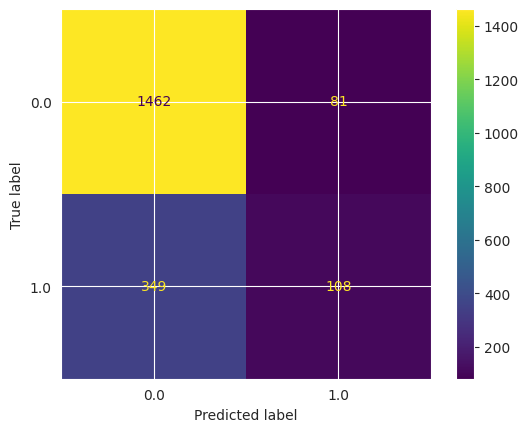

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize = None)